## folium 
- 지도 기반의 시각화

In [1]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
# !pip install folium 패키지 설치

In [3]:
import folium

### 지도
- Map: 지도
- Marker: 위치

In [4]:
#플레이데이터 독산 위도, 경도
latitude, longitude = (37.491759, 126.927651)

In [5]:
m = folium.Map(location=[latitude,longitude],
               zoom_start=17,
               width=750,
               height=500
              )
folium.Marker([latitude,longitude],
              popup="<div style ='width:100px'>플레이데이터</div>",
              tooltip='플레이데이터').add_to(m)
m

In [6]:
popup_tag="""
<div style='width:65px'>
    <a href="https://playdata.io">
      플레이데이터
    </a>
</div>
"""

### 국가별 위치 Map

#### 국가별 위치 

In [7]:
import requests
import json

In [8]:
#국가별 위치 데이터

url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
response=requests.get(url)
data_json=response.json()
data_json

type(data_json['features'])  #위도, 경도 값 
len(data_json['features'])

180

In [9]:
for feature in data_json['features']:
    print(feature)
    break

{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388]

In [10]:
#json으로부터 얻은 데이터, 국가별 경계에 대한 지도의 위도,경도

country_name = [feature['properties']['name']for feature in data_json['features']]
country_name

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'French Southern and Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of the Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea Bissau',
 'Equatorial Guinea',
 'Greece',
 'Greenland',
 'Guatemala'

#### survey 데이터의 Country 지도

##### 데이터 불러오기

In [11]:
import pandas as pd
schema_raw_df = pd.read_csv('datas/survey_results_schema.csv',index_col='qname')['question']

In [12]:
schema_raw_df['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

##### DataFrame 만들기

In [25]:
country_raw_df = pd.read_csv('datas/survey_results_public.csv',index_col='ResponseId')

In [27]:
country= country_raw_df.Country.copy()

In [29]:
country.replace(rename_data,inplace=True)

In [32]:
country

ResponseId
1                             NaN
2                          Canada
3                  United Kingdom
4                          Israel
5        United States of America
                   ...           
73264                     Nigeria
73265    United States of America
73266    United States of America
73267              United Kingdom
73268                      Canada
Name: Country, Length: 73268, dtype: object

In [33]:
#Country column에 대한 정보만  


country_counts = country.value_counts()
country_counts_df = pd.DataFrame({'Country':country_counts.index,
                                  'Count':country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom,4190
4,Canada,2490
...,...,...
174,Monaco,1
175,Djibouti,1
176,Seychelles,1
177,Solomon Islands,1


##### 데이터 가공하기
- 두 데이터가 일치하도록

In [34]:
sorted(country_name)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'Ind

In [35]:
#두 데이터간에 겹치지 않는 데이터 조회

sorted(set(country_counts_df.Country).symmetric_difference(country_name))

['Andorra',
 'Antarctica',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Brunei Darussalam',
 'Burundi',
 'Cape Verde',
 'Central African Republic',
 'Congo, Republic of the...',
 "Côte d'Ivoire",
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Guinea Bissau',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Iran, Islamic Republic of...',
 'Isle of Man',
 'Ivory Coast',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macedonia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Monaco',
 'New Caledonia',
 'Nomadic',
 'Northern Cyprus',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Moldova',
 'Republic of Serbia',
 'Republic of the Congo',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Somaliland',
 'South Sudan',
 'Syria',
 'Syrian Arab Republic',
 'The Bahamas',
 'The former Yugo

In [36]:
#서로 다른 나라 이름을 country_name의 데이터로 변경

rename_data = {
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
}
    
rename_data

{'Republic of Korea': 'South Korea',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Viet Nam': 'Vietnam',
 'Russian Federation': 'Russia'}

In [37]:
country_counts_df.replace(rename_data,inplace=True)

In [38]:
sorted(country_counts_df.Country.values)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong (S.A.R.)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Iraq

#### folium으로 지도 그리기
- 국가별 지도 데이터와 survey 국가들의 지도 데이터 합치기

In [39]:
#세계지도
m = folium.Map(location=[30,0],zoom_start=2)
m

In [40]:
folium.Choropleth(
    geo_data=url, #json의 주소값
    data = country_counts_df,
    columns=['Country','Count'],
    key_on='feature.properties.name',
    threshold_scale=[1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color='YlGn',
    fill_opacity=0.7,   #그래프 투명도
    line_opacity=0.2,   #선의 투명도
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)

m

In [41]:
m.save('datas/country.html')

### 서울시 행정구역 Map

In [54]:
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.57,126.99],
    zoom_start=11,
)

folium.Choropleth(
     geo_data=seoul_geojson,
     fill_color='#22AA44',
     fill_opacity=0.4,
     line_opacity=1
 ).add_to(m)
    
m

##### https://python-visualization.github.io/folium/quickstart.html

## Wordcloud
- 단어 빈도 시각화

In [51]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.2.2          |   py39hb82d6ee_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         192 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py39hb82d6ee_0 None




wordcloud-1.8.2.2    | 187 KB    |            |   0% 
wordcloud-1.8.2.2    | 187 KB    | 8          |   9% 
wordcloud-1.8.2.2    | 187 KB    | ########## | 100% 
wordcloud-1.8.2.2    | 187 KB    | ########## | 100% 

p



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [56]:
from wordcloud import WordCloud

In [57]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv',index_col='ResponseId')

#### 데이터 가공하기
- DevType column활용

In [61]:
dev_type = survey_raw_df.DevType.copy()

In [63]:
dev_type.dropna(inplace=True)

In [64]:
dev_type=dev_type.str.replace(';','').str.replace(',','')

In [65]:
dev_type

ResponseId
3        Data scientist or machine learning specialistD...
4                                     Developer full-stack
5        Developer front-endDeveloper full-stackDevelop...
8                              Developer full-stackStudent
9                                       Developer back-end
                               ...                        
73264                                   Developer back-end
73265        Data scientist or machine learning specialist
73266    Developer full-stackDeveloper desktop or enter...
73267    Developer front-endDeveloper desktop or enterp...
73268    Developer front-endEngineer dataEngineer site ...
Name: DevType, Length: 61302, dtype: object

In [67]:
words = ''.join(dev_type)

In [ ]:
words

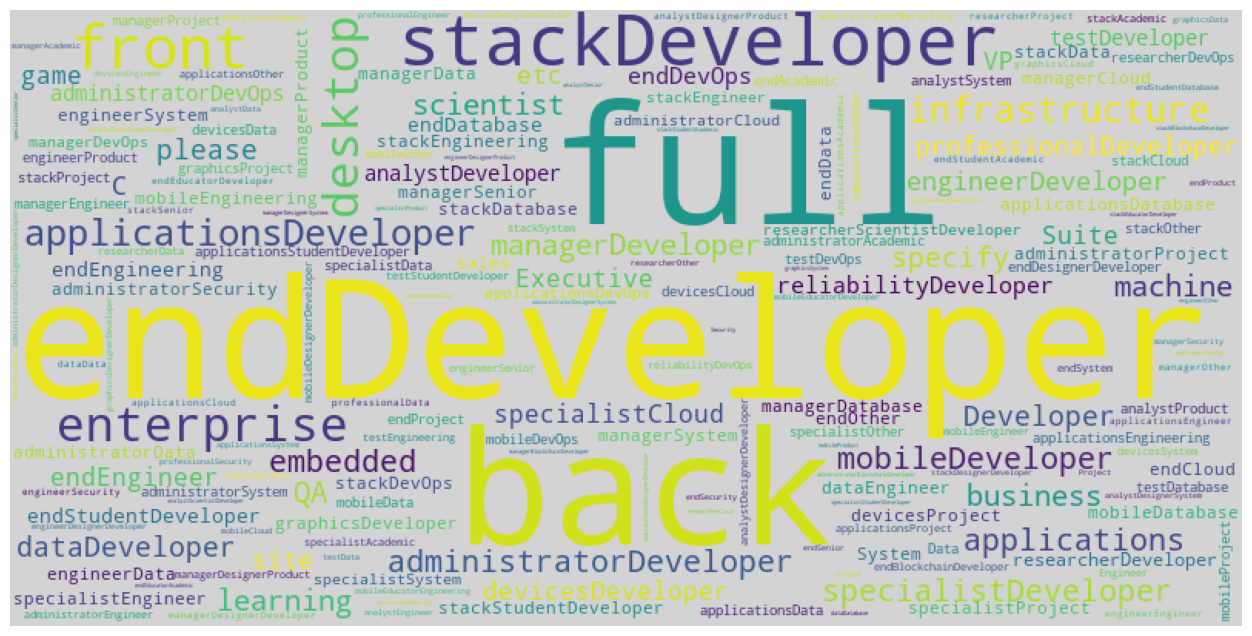

In [69]:
import matplotlib.pyplot as plt

wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)
plt.figure(figsize=(16,8))
plt.axis('off')
plt.grid(False)
plt.imshow(wc)
plt.show()